In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [4]:
weights = {
    'tmax': 0.001,
    'prcp': 0.019,
    'wspd': 0.007,
    'pres': 0.008,
    'Footfall': 0.15,  # High importance
    'Wave Height (m)': 0.08,
    'Ocean Currents (m/s)': 0.06,
    'Swell Height (m)': 0.05,
    'Storm Surge': 0.28, # High importance
    'Tsunami Alerts': 0.32, # High importance
    'Humidity (%)': 0.01,
    'UV Index': 0.015
}

In [5]:
total_weight = sum(weights.values())
total_weight

1.0

In [6]:
df = pd.read_csv('normalized_data.csv')

In [7]:
# Calculate Risk Score
def calculate_risk_score(row):
    score = 0
    for column, weight in weights.items():
        if column in row:
            score += row[column] * weight
    return score

In [8]:
df['Risk Score'] = df.apply(calculate_risk_score, axis=1)
# Apply the function to each row

In [9]:
df.head()

,Beach Name,Month,Year,tavg,tmin,tmax,prcp,wdir,wspd,pres,Footfall,Wave Height (m),Ocean Currents (m/s),Swell Height (m),Storm Surge,Tsunami Alerts,Humidity (%),UV Index,Risk Score
0,Agonda Beach,Jan,2022.0,0.651992,0.485564,0.722802,0.000060,0.521533,0.295551,0.771291,0.727273,0.076471,0.117647,0.453333,0.0,1.0,0.655429,0.487143,0.487759
1,Agonda Beach,Feb,2022.0,0.710692,0.475722,0.757079,0.000000,0.716884,0.276483,0.677198,0.636364,0.482353,0.264706,0.186667,0.0,0.0,0.251714,0.690000,0.180236
2,Agonda Beach,Mar,2022.0,0.829490,0.752625,0.862891,0.001094,0.548413,0.217867,0.577610,0.363636,0.111765,1.000000,0.540000,1.0,0.0,0.273429,0.617143,0.449508
3,Agonda Beach,Apr,2022.0,1.000000,0.843176,0.915052,0.016852,0.856843,0.235876,0.535027,0.272727,0.564706,0.470588,0.740000,1.0,0.0,0.552286,0.401429,0.450032
4,Agonda Beach,May,2022.0,0.946191,0.887139,0.837556,0.086588,0.928721,0.442444,0.393544,0.272727,0.152941,0.448529,0.453333,0.0,0.0,0.197143,0.297143,0.117880


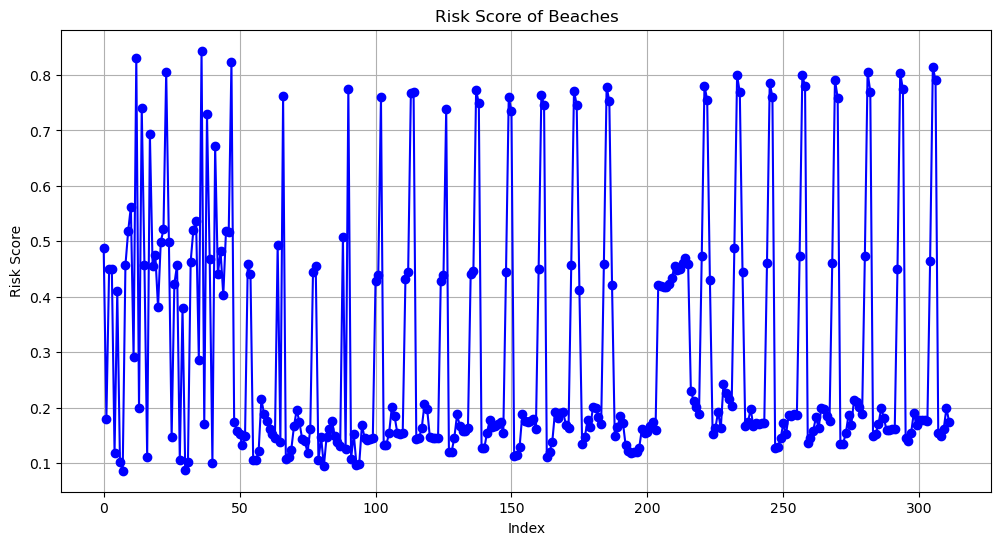

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Risk Score'], marker='o', linestyle='-', color='b')
plt.xlabel('Index')
plt.ylabel('Risk Score')
plt.title('Risk Score of Beaches')
plt.grid(True)
plt.show()

In [11]:
# Define the number of bins
num_bins = 5  # Adjust as needed
bin_edges = pd.cut(df['Risk Score'], bins=num_bins, include_lowest=True)

# Get the range for each bin
bin_ranges = bin_edges.value_counts().index.tolist()

# Calculate the min and max for each bin
bin_summary = {}
for bin_range in bin_ranges:
    bin_df = df[(df['Risk Score'] >= bin_range.left) & (df['Risk Score'] < bin_range.right)]
    min_value = bin_df['Risk Score'].min()
    max_value = bin_df['Risk Score'].max()
    bin_summary[bin_range] = (min_value, max_value)

# Print the summary
for bin_range, (min_val, max_val) in bin_summary.items():
    print(f"Range {bin_range}: Min = {min_val:.2f}, Max = {max_val:.2f}")

Range (0.0843, 0.238]: Min = 0.09, Max = 0.23
Range (0.389, 0.541]: Min = 0.40, Max = 0.54
Range (0.692, 0.844]: Min = 0.69, Max = 0.84
Range (0.238, 0.389]: Min = 0.24, Max = 0.38
Range (0.541, 0.692]: Min = 0.56, Max = 0.67


In [12]:
ranges = [(0, 0.333), (0.333, 0.666), (0.666, 1)]

# Count values in each range
range_counts = {}
for lower, upper in ranges:
    count = df[(df['Risk Score'] >= lower) & (df['Risk Score'] < upper)].shape[0]
    range_counts[f"{lower}-{upper}"] = count

# Print the summary
for range_str, count in range_counts.items():
    print(f"Range {range_str}: {count} values")

Range 0-0.333: 204 values
Range 0.333-0.666: 68 values
Range 0.666-1: 40 values


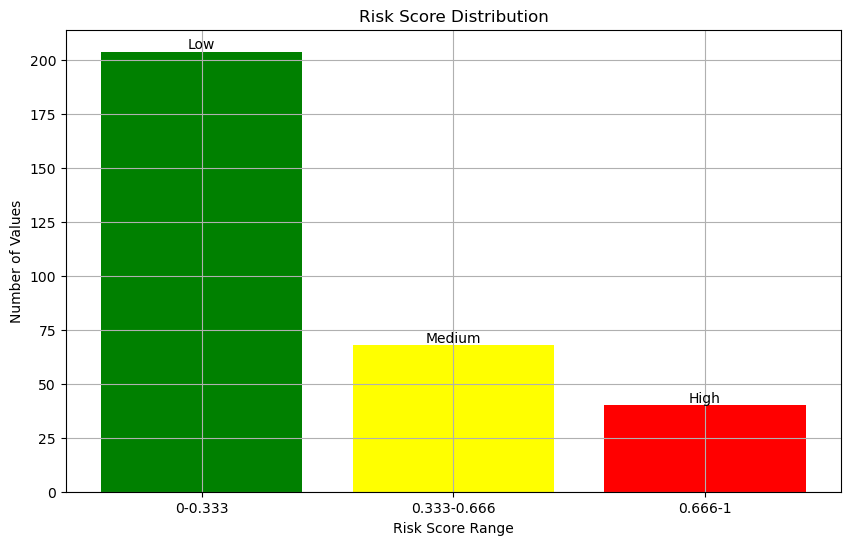

In [13]:
ranges = [(0, 0.333), (0.333, 0.666), (0.666, 1)]

# Count values in each range
range_counts = {}
for lower, upper in ranges:
    count = df[(df['Risk Score'] >= lower) & (df['Risk Score'] < upper)].shape[0]
    range_counts[f"{lower}-{upper}"] = count

# Plot the bar graph
colors = ['green', 'yellow', 'red']
labels = ['Low', 'Medium', 'High']

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(range_counts)), range_counts.values(), color=colors)

# Set labels and titles
plt.xlabel('Risk Score Range')
plt.ylabel('Number of Values')
plt.title('Risk Score Distribution')
plt.xticks(range(len(range_counts)), range_counts.keys())

# Add labels to bars
for bar, label in zip(bars, labels):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, label, va='bottom', ha='center', color='black')

plt.grid(True)
plt.show()

In [14]:
df['Risk'] = pd.cut(df['Risk Score'], bins=[0, 0.27, 0.55, 1], labels=['Low', 'Medium', 'High'], include_lowest=True)

In [15]:
df.head()

,Beach Name,Month,Year,tavg,tmin,tmax,prcp,wdir,wspd,pres,Footfall,Wave Height (m),Ocean Currents (m/s),Swell Height (m),Storm Surge,Tsunami Alerts,Humidity (%),UV Index,Risk Score,Risk
0,Agonda Beach,Jan,2022.0,0.651992,0.485564,0.722802,0.000060,0.521533,0.295551,0.771291,0.727273,0.076471,0.117647,0.453333,0.0,1.0,0.655429,0.487143,0.487759,Medium
1,Agonda Beach,Feb,2022.0,0.710692,0.475722,0.757079,0.000000,0.716884,0.276483,0.677198,0.636364,0.482353,0.264706,0.186667,0.0,0.0,0.251714,0.690000,0.180236,Low
2,Agonda Beach,Mar,2022.0,0.829490,0.752625,0.862891,0.001094,0.548413,0.217867,0.577610,0.363636,0.111765,1.000000,0.540000,1.0,0.0,0.273429,0.617143,0.449508,Medium
3,Agonda Beach,Apr,2022.0,1.000000,0.843176,0.915052,0.016852,0.856843,0.235876,0.535027,0.272727,0.564706,0.470588,0.740000,1.0,0.0,0.552286,0.401429,0.450032,Medium
4,Agonda Beach,May,2022.0,0.946191,0.887139,0.837556,0.086588,0.928721,0.442444,0.393544,0.272727,0.152941,0.448529,0.453333,0.0,0.0,0.197143,0.297143,0.117880,Low


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import shuffle

In [17]:
for i in range(0,100):
# Shuffle the dataset
    df = shuffle(df, random_state=42)
    i += 1

In [18]:
#Feature Engineering
X = df.drop(['Risk', 'Risk Score', 'Beach Name', 'Month', 'Year', 'tavg', 'tmin', 'wdir'], axis=1)  # Drop unnecessary columns
y = df['Risk']


In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Initialize the AdaBoost Classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [21]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [22]:
# Evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.9206349206349206
Confusion Matrix:
 [[ 6  0  2]
 [ 0 41  0]
 [ 3  0 11]]


In [23]:
# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

Cross-validation scores: [0.92063492 0.85714286 0.9516129  0.9516129  0.85483871]
Mean CV score: 0.907168458781362


In [24]:
import numpy as np
import pandas as pd

# Function to get user input with a default value and recommendation
def get_user_input(field_name, default_value):
    user_input = input(f"Enter value for {field_name} (Recommended {default_value}): ")
    return float(user_input) if user_input else default_value

# Function to calculate Risk Score
def calculate_risk_score1(tmax, prcp, wspd, pres, footfall, wave_height, ocean_currents,
                         swell_height, storm_surge, tsunami_alerts, humidity, uv_index):
    score = (
        tmax * 0.001 +
        prcp * 0.019 +
        wspd * 0.007 +
        pres * 0.008 +
        footfall * 0.15 + 
        wave_height * 0.08 +
        ocean_currents * 0.06 +
        swell_height * 0.05 +
        storm_surge * 0.28 + 
        tsunami_alerts * 0.32 + 
        humidity * 0.01 +
        uv_index * 0.015
    )
    return score

# Function to classify Risk based on Risk Score
def classify_risk(risk_score):
    risk_category = pd.cut([risk_score], bins=[0, 0.27, 0.55, 1], labels=['Low', 'Medium', 'High'], include_lowest=True)
    return risk_category[0]

# Function to run the model with user inputs, heuristic function, and classification
def run_model(clf):
    # Ask for user inputs with realistic defaults
    tmax = get_user_input('MAX Temp.', 30.5)
    prcp = get_user_input('Precipitation in mm', 2.1)
    wspd = get_user_input('Wind Speed in m/s', 12.5)
    pres = get_user_input('Atm. Ppressure above Sea Level', 1010.2)
    footfall = get_user_input('Footfall', 150)
    wave_height = get_user_input('Wave Height (m)', 1.2)
    ocean_currents = get_user_input('Ocean Currents (m/s)', 0.7)
    swell_height = get_user_input('Swell Height (m)', 0.9)
    storm_surge = get_user_input('Storm Surge', 0.4)
    tsunami_alerts = get_user_input('Tsunami Alerts', 0)
    humidity = get_user_input('Humidity (%)', 76.5)
    uv_index = get_user_input('UV Index', 8.1)

    # Calculate Risk Score using the Heuristic function
    risk_score = calculate_risk_score1(
        tmax, prcp, wspd, pres, footfall, wave_height, ocean_currents,
        swell_height, storm_surge, tsunami_alerts, humidity, uv_index
    )
    print(f"\nCalculated Risk Score: {risk_score}")

    # Prepare the input data for the model
    input_data = np.array([
        tmax, prcp, wspd, pres, footfall, wave_height, ocean_currents,
        swell_height, storm_surge, tsunami_alerts, humidity, uv_index]).reshape(1, -1)
    
    # Use the trained AdaBoost classifier model to predict the risk category
    predicted_risk = clf.predict(input_data)

    # Classify Risk based on the Risk Score
    risk_category = classify_risk(risk_score/100)

    # Print the results
    print(f"\nPredicted Risk Category: {predicted_risk[0]}")
    print(f"Classified Risk Category based on Risk Score: {risk_category}")

# Example usage assuming your AdaBoost classifier is already trained and available as `adaboost_model`
# adaboost_model = AdaBoostClassifier().fit(X_train, y_train)

# Call the function to run the model
run_model(clf)


Enter value for MAX Temp. (Recommended 30.5): 
Enter value for Precipitation in mm (Recommended 2.1): 
Enter value for Wind Speed in m/s (Recommended 12.5): 
Enter value for Atm. Ppressure above Sea Level (Recommended 1010.2): 
Enter value for Footfall (Recommended 150): 
Enter value for Wave Height (m) (Recommended 1.2): 
Enter value for Ocean Currents (m/s) (Recommended 0.7): 
Enter value for Swell Height (m) (Recommended 0.9): 
Enter value for Storm Surge (Recommended 0.4): 
Enter value for Tsunami Alerts (Recommended 0): 
Enter value for Humidity (%) (Recommended 76.5): 
Enter value for UV Index (Recommended 8.1): 

Calculated Risk Score: 31.921000000000003

Predicted Risk Category: Medium
Classified Risk Category based on Risk Score: Medium
